In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

In [3]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
faces.images.shape

(1348, 62, 47)

In [4]:
imshape = faces.images[0].shape
imshape

(62, 47)

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=150, whiten=True, random_state=0)
pca.fit(faces.data)

PCA(n_components=150, random_state=0, whiten=True)

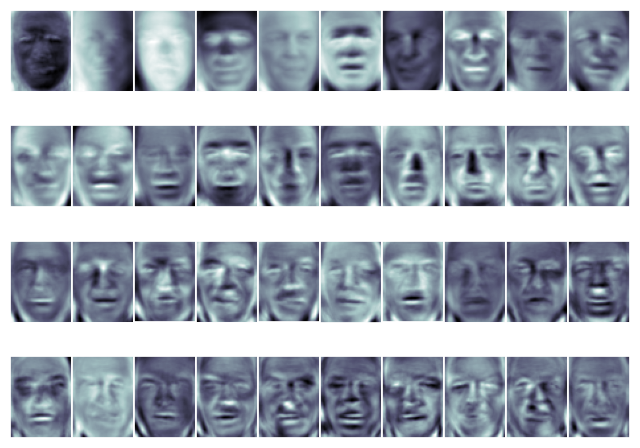

In [6]:
fig,ax = plt.subplots(4,10, figsize=(8,6),
                      subplot_kw={'xticks':[], 'yticks':[]},
                      gridspec_kw=dict(hspace=0, wspace=0))
for i,axi in enumerate(ax.flat):
  axi.imshow(pca.components_[i].reshape(imshape), cmap='bone')

Text(0, 0.5, 'cumulative variance ratio')

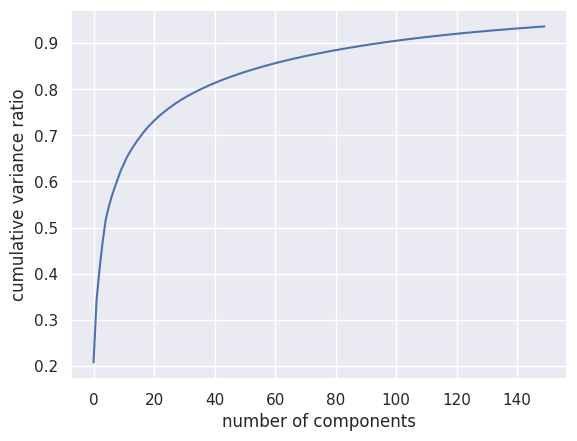

In [7]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative variance ratio')

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=150, whiten=True, random_state=0)
pca.fit(faces.data)

PCA(n_components=150, random_state=0, whiten=True)

In [9]:
faces_trf = pca.transform(faces.data)
faces_inv = pca.inverse_transform(faces_trf)

Text(0, 0.5, '150 dim\nreconstruction')

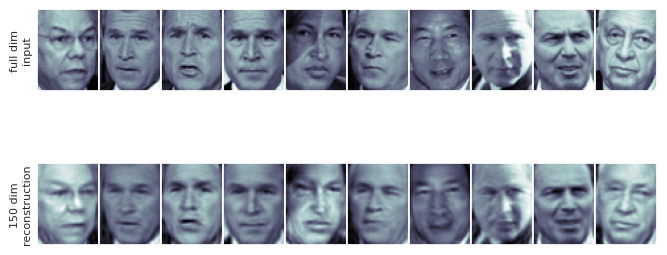

In [10]:
fig,ax = plt.subplots(2,10, figsize=(8,4),
                      subplot_kw={'xticks':[], 'yticks':[]},
                      gridspec_kw=dict(hspace=0, wspace=0))
for i in range(10):
  ax[0,i].imshow(faces.data[i].reshape(imshape), cmap='bone')
  ax[1,i].imshow(faces_inv[i].reshape(imshape), cmap='bone')

ax[0,0].set_ylabel('full dim\ninput', fontsize=8)
ax[1,0].set_ylabel('150 dim\nreconstruction', fontsize=8)